#9.1 순차 데이터와 순환 신경망

**순차 데이터**

- 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터
- 이를 다룰 때는 이전에 입력한 데이터를 기억하는 능력이 필요하다
- 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있다 -> **순환신경망(RNN)**이라고 부른다

**피드포워드 신경망**

- 입력데이터의 흐름이 앞으로만 전달되는 신경망
- 한번 샘플을 쓰고 버리는 신경망
- ex) 완전 연결 신경망, 합성곱 신경망

**순환 신경망(RNN)**

타임스텝

- 샘플을 처리하는 한 단계

셀

- 층

은닉 상태

- 셀의 출력



- 다음 샘플의 은닉상태를 만들기 위해서 이전 타임스텝의 은닉상태를 이용한다

- 타임스텝이 지날 수록 오래된 샘플에 대한 정보는 희미해진다

- 활성화 함수도 꼭 필요하고, 보통 tanh함수를 많이 쓴다

- 순환 신경망의 모델파라미터

    - 입력(샘플)에 곱해지는 가중치 (Wx)
    - 재사용하는 은닉상태에 곱해지는 가중치  (Wh)  (1개 뿐)
    - 절편  (b)

- 은닉상태 = (Wx) * (입력) + (Wh) * (이전 타임스텝의 은닉상태) + b

**셀의 가중치와 입출력**

**1) 가중치의 갯수**

EX) 입력 4개, 순환층에 뉴런 3개

Wx : 기존 완전 연결 신경망과 동일... -> 4 * 3

Wb : 각 뉴런의 은닉상태가 다른 모든 뉴런에게 전달됨.. -> 3 * 3

절편 : 각 뉴런마다 1개.. -> 3 * 1

-> 12 + 9 + 3 = 24..

**2) 입출력**



입력은 일반적으로 샘플마다 2개의 차원을 가짐

하나의 샘플을 보통 시퀀스라고 말함 -> 시퀀스의 길이 : 타임스텝의 길이

EX) I am a boy

입력이 4개의 단어.. -> 여기의 각 단어를 3개의 어떤 숫자로 표현한다고 해보자,,(뒤에 나오는 어휘사전의 갯수에 따른 정수값 변형..)

- 결국, 하나의 샘플은 시퀀스길이(단어개수)와 단어 표현(정수값)의 2차원 배열..

- 순환층을 통과하면 뉴런의 갯수와 같은 크기의 1차원 배열로 바뀜..

순환층은 기본적으로 **마지막 타임스텝의 은닉 상태만 출력으로 내보냄**

순환층이 여러개 쌓일때면 마지막 층을 제외한 모든 셀은 모든 타임스텝의 은닉 상태를 출력함..

- 결국, 마지막 층을 제외하고 모든 층은 은닉상태를 출력함

마지막 출력층은 밀집층..

- 소프트맥스, 시그모이드..

마지막 순환층의 출력이 1차원(뉴런의 길이만큼의)배열.. -> Flatten()층 사용할 필요 없음

#9.2 순환 신경망으로 IMDB 리뷰  분류하기

자연어 처리

- 컴퓨터를 사용해 인간의 언어를 처리하는 분야
- 말뭉치 : 훈련데이터

**IMDB 리뷰 데이터셋**

- 인터넷 영화 데이터베이스 imdb.com에서 수집한 리뷰를 긍정과 부정으로 분류해놓은 데이터셋
- 50000개의 샘플, 25000개 씩 훈련, 테스트 데이터
- 텍스트를 어떤 숫자 데이터로 바꾼다..(일반적으로 등장하는 단어마다 고유한 정수를 부여한다)
- 그렇게 분리된 단어를 **토큰**이라고 한다
- 토큰 중에 특이한 토큰도 있다

    - 0: 패딩, 1: 문장의 시작, 2: 어휘사전에 없는 토큰

- 어휘사전 : 훈련 세트에서 고유한 단어를 뽑아 만든 목록

In [34]:
#데이터 가져오기
#num_words 매개변수를 사용해서 데이터셋에서 가장 자주 등장하는 단어 몇개만 사용할지 지정
#즉, 어휘사전의 갯수를 지정..

from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [35]:
print(train_input.shape, test_input.shape)

#리뷰 텍스트의 길이가 제각각이라서 1차원 리스트에 담는게 효율적이다.
#[리뷰1, 리뷰2, ...] 이런식으로..

(25000,) (25000,)


In [36]:
print(len(train_input[0]))

#218개의 토큰으로 이루어짐..

218


In [37]:
print(len(train_input[1]))

189


In [38]:
print(train_input[0])
#어휘세트 500개에 없는 단어는 2..

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [39]:
#타깃 데이터.. 0(부정) / 1(긍정)
#이진분류..

print(train_target)

[1 0 0 ... 0 1 0]


In [40]:
#검증세트 분리

from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [41]:
#훈련세트 조사좀 해보자..
#평균 길이..

import numpy as np
lengths = np.array([len(x) for x in train_input])
# 각 훈련데이터의 길이를 갖는 lengths 배열을 만들엇다

In [42]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


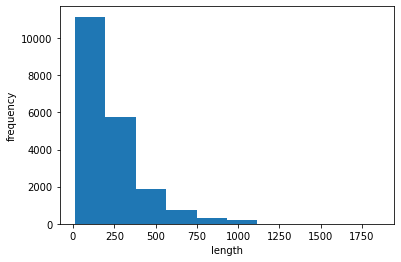

In [43]:
#훈련데이터의 분포는?
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

- 대부분 리뷰는 300 미만
- 길이가 100까지만 보자..

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

#훈련 텍스트 세트의 길이를 maxlen매개변수를 이용해서 맞출 수 있다
#기본값을 뒤에서 부터 자르는데, pad_sequences의 truncating매개변수를 'pre' / 'post'로 지정해서 바꿀 수 있다

In [45]:
print(train_seq.shape)
#이차원 배열이다..

(20000, 100)


In [46]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [47]:
print(train_input[0][-10:])
#이걸로 보면 끝에 100개를 잘라서 가져왔다..

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [48]:
print(train_seq[5])
#얘는 원래 길이가 100보다 짧았네.. 그니까 100으로 맞출려고 패딩(0)이 들어갔네..

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [49]:
#검증세트도 길이 100으로 바꾸자
val_seq = pad_sequences(val_input, maxlen=100)

**순환 신경망(RNN) 만들기**

- SimpleRNN클래스로 순환층 클래스를 만들 수 있다..
- 이진 분류이니까 시그모이드
- Sequential 클래스는 일반적인 신경망 모델을 다 만들 수 있다
- 다만 Sequential이라는 이름은 순서대로 층을 쌓기 때문에 붙인 것이다.

In [50]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape = (100,500)))
#SimpleRNN의 기본 활성화함수 : tanh함수

model.add(keras.layers.Dense(1,activation = 'sigmoid'))
#이진 분류니까 마지막 출력층의 뉴런이 1개

**왜 input_shape가 (100,500)일까?**

- 명백히 토큰의 값에는 상관관계가 없다.
- 정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하기 위해서 원핫인코딩을 표현한다.
- 길이가 원래 100인 데이터였는데, 그 100개의 정수가 모두 원핫인코딩 되고, 앞에서 어휘사전을 500개로 잡았으니까 크기가 (100,500)으로 바뀐다.

-> **원핫인코딩 때문!!**

In [51]:
# 원핫인코딩을 위한 유틸리티 keras.utils의 to_categorical

train_oh = keras.utils.to_categorical(train_seq)

In [52]:
print(train_oh.shape)

#100개의 정수 하나하나가 원핫인코딩 되었기 때문에 크기가 100, 500으로 바뀌었다
#그래서 input_shape에 (100, 500)을 넣은 것이다.

(20000, 100, 500)


In [53]:
print(train_oh[0][0][:12])
#첫번째 훈련데이터의 첫번째 원핫인코딩된 것의 인덱스 12까지 출력

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [54]:
print(np.sum(train_oh[0][0]))
#잘 원핫인코딩 되었다..

1.0


In [55]:
#검증세트도 원핫인코딩..
#val_seq가 길이 100으로 줄인 것
val_oh = keras.utils.to_categorical(val_seq)

In [56]:
model.summary()
#순환층의 모델파라미터 엄청 많다.. (4072)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


순환층 모델 파라미터

- 500(입력차원) * 8(층의 뉴런수) + 8 * 8(서로서로 곱해지는 이전은닉상태를 위한 파라미터) + 8(절편) -> 4072

밀집층 모델 파라미터

- 8(입력층) * 1(출력층) + 1 (절편) -> 9


**순환 신경망 훈련하기**

케라스의 장점

- 모델을 만드는 것은 달라도 훈련법은 같다

- 옵티마이저 설정, 콜백설정..

In [57]:
#학습률을 별도로 지정하기 위해 객체 생성..
#에포크는 100, 배치사이즈는 64로 지정..
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size=64, validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 78ms/step - loss: 0.6982 - accuracy: 0.5084 - val_loss: 0.6977 - val_accuracy: 0.5188
Epoch 2/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6940 - accuracy: 0.5184 - val_loss: 0.6952 - val_accuracy: 0.5220
Epoch 3/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6909 - accuracy: 0.5275 - val_loss: 0.6931 - val_accuracy: 0.5246
Epoch 4/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6881 - accuracy: 0.5357 - val_loss: 0.6913 - val_accuracy: 0.5284
Epoch 5/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6856 - accuracy: 0.5451 - val_loss: 0.6895 - val_accuracy: 0.5364
Epoch 6/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6831 - accuracy: 0.5525 - val_loss: 0.6879 - val_accuracy: 0.5422
Epoch 7/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6806 - accuracy: 0.5621 - val_loss: 0.6861 - val_ac

- 38에포크에서 검증점수 : 0.4785
- 39에포크에서 검증점수 : 0.4814 (증가)
- 40에포크에서 검증점수 : 0.4791 (38보다 증가)
- 41에포크에서 검증점수 : 0.4786 (38보다 증가)

-> 3번 참았다.. 끝 -> 성능 78퍼?

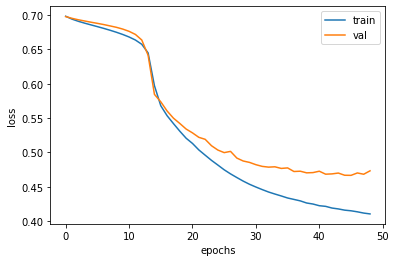

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [59]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


원-핫 인코딩을 하면 입력데이터가 너무 커진다..

다른 방법이 없을까?

**단어 임베딩을 사용하기**

**단어 임베딩**

- 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다..
- 이러한 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미있는 값이기 때문에 더 좋은 성능을 낸다
- keras.layers.Embedding클래스에서 임베딩 층을 만들 수 있다
- 입력으로 정수데이터를 입력받으니까 메모리를 훨씬 효율적으로 사용할 수 있다.
- 임베딩도 2차원 배열로 늘리긴 하지만 훨씬 크기가 작다

In [60]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
# 500 : 어휘사전의 크기 (이 만큼의 정수를 임베딩 벡터로 만들겠다)
# 16 : 임베딩 벡터의 크기 (원핫인코딩은 크기가 500이었는데 16으로 아주 작게 할 수 있다..)
#input_length=100 : 샘플의 길이를 100으로 맞추었다

model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [61]:
model2.summary()

#순환층의 모델 파라미터수가 위의 model(원핫 인코딩)보다 엄청 줄었다..
#(4072 -> 200)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


임베딩 층의 모델 파라미터

- 500(토큰 갯수) * 16(만들려는 실수 벡터의 크기) -> 8000

순환층의 모델 파라미터

- 16(벡터의 크기) * 8(뉴런의 갯수) + 8(절편) -> 200

밀집층의 모델 파라미터

- 8(입력층 뉴런 갯수) * 1(출력층) + 1(절편) -> 9

In [62]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 29s 90ms/step - loss: 0.6878 - accuracy: 0.5412 - val_loss: 0.6706 - val_accuracy: 0.6258
Epoch 2/100
313/313 [==============================] - 27s 85ms/step - loss: 0.6505 - accuracy: 0.6657 - val_loss: 0.6346 - val_accuracy: 0.7006
Epoch 3/100
313/313 [==============================] - 28s 90ms/step - loss: 0.6182 - accuracy: 0.7134 - val_loss: 0.6065 - val_accuracy: 0.7266
Epoch 4/100
313/313 [==============================] - 27s 87ms/step - loss: 0.5915 - accuracy: 0.7397 - val_loss: 0.5884 - val_accuracy: 0.7328
Epoch 5/100
313/313 [==============================] - 28s 90ms/step - loss: 0.5695 - accuracy: 0.7547 - val_loss: 0.5655 - val_accuracy: 0.7546
Epoch 6/100
313/313 [==============================] - 27s 87ms/step - loss: 0.5503 - accuracy: 0.7666 - val_loss: 0.5507 - val_accuracy: 0.7576
Epoch 7/100
313/313 [==============================] - 28s 89ms/step - loss: 0.5352 - accuracy: 0.7708 - val_loss: 0.5383 - val_ac

- 27에포크에서 검증점수 : 0.4669
- 28에포크에서 검증점수 : 0.4680 (증가)
- 29에포크에서 검증점수 : 0.4689 (27보다 증가)
- 30에포크에서 검증점수 : 0.4676 (27보다 증가)

-> 3번 참았다.. 끝 -> 성능 78퍼 -> 원핫인코딩과 비슷하다

-> 순환층의 모델파라미터가 훨씬 적다..

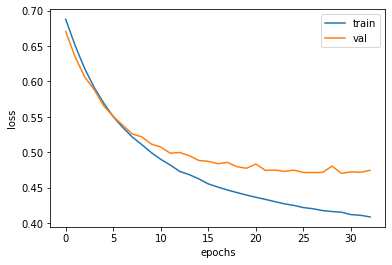

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련손실은 계속 감소하는데. 이를 개선할 방법이 있는지 알아보겟다..

**9-2 정리**

- 순환신경망을 실제 모델을 만들었다

1) 입력데이터를 원핫 인코딩으로 변환하여 순환층에 직접 주입

    -> 입력데이터가 너무 커서 메모리 낭비
    
    -> 어휘사전 크기의 벡터가 만들어짐
2) 입력데이터(정수)를 그대로 순환층에 넣기위해 Embedding층을 추가

    -> 단어마다 실수로 이루어진 밀집 벡터를 학습함
    
    -> 비교적 벡터의 크기가 작음
    
    -> 순환층의 모델 파라미터가 더 적음..
    
    -> 단어사이의 관계를 표현할 수 있기 때문에 성능이 더 좋다

#9.3 LSTM과 GRU 셀

시퀀스가 길수록 순환되는 은닉 상태에 대한 정보가 점차 희석되는 어려움을 개선하기위해 개발됨

**LSTM 구조**

- Long Short-Term Memory : 단기기억을 오래 하겠다..

은닉상태 / **셀상태** 가 순환하는 구조이다..

은닉상태 / 셀상태 모두 다음 은닉상태를 만드는 데 기여한다..

- LSTM에는 총 4개의 셀 ( 시그모이드 2, tanh 2 ) 이 있다..
- 각 셀에서 계산하는 가중치가 있는데, 그 가중치가 다 다르다.. 그걸 W1, W2, W3, W3 라고 하겠다
- 이 네 가중치 모두 편의상 입력과 은닉상태에 곱해지는 각각의 가중치를 합쳐서 나타낸다고 하자
- 사용되는 활성화 함수는 tanh 와 시그모이드 함수가 있다

**다음 은닉상태 계산법**

    - (K를 tanh함수에 통과시킨 값) * (입력과 이전 은닉상태에 W1을 곱해서 시그모이드 통과시킨 값)

    - 사실상 이 식의 * 는 마지막 곱하기 이다
        -> 곱하기 3회 ( 출력 게이트 )

**앞의 식의 K 계산법**

    - (이전 셀 상태) * (입력과 이전 은닉상태에 W2를 곱해서 시그모이드 통과시킨 값)
        -> 곱하기 1회 ( 삭제 게이트 )
    
    - (입력과 이전 은닉상태에 W3을 곱해서 시그모이드 통과시킨 값) * (입력과 이전 은닉상태에 W4를 곱해서 tanh 통과시킨 값)
        -> 곱하기 2회 ( 입력 게이트 )
    
    - 위의 두 값을 더한 값이 K 의 값이다!!

**다음 셀 상태**

    - K 의 값이 다음 셀 상태이다

**LSTM 신경망 훈련하기**

위의 셀 계산을 LSTM 클래스에서 알아서 다 해준다,,

In [64]:
#데이터 가져오기..

from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [65]:
#패딩해서 길이맞추기..

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [66]:
#순환층 만들기..

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
#입력의 길이를 100으로 했고, 어휘사전의 갯수가 500이니까 500개의 정수를 16개의 실수벡터로 만들 것을 지정
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [67]:
#모델 확인..

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


임베딩 층의 모델 파라미터

- 500 (토큰 갯수) * 16 (실수벡터 크기) -> 8000

LSTM 층의 모델 파라미터

- {16 (실수벡터 크기) * 8(뉴런의 갯수) + 8 * 8 (서로 순환될때 뉴런끼리 곱해지는 가중치) + 8 (절편)} * 4 (LSTM층은 셀이 4개) 
    
    ->  200 * 4 = 800

밀집층의 모델 파라미터

- 8 (입력뉴런) * 1 (출력뉴런) + 1 (절편) -> 9

In [68]:
#모델 컴파일 및 훈련..

rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

#콜백객체 생성..
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

#훈련
history = model.fit(train_seq, train_target, epochs = 100, batch_size=64, validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 9ms/step - loss: 0.6926 - accuracy: 0.5533 - val_loss: 0.6918 - val_accuracy: 0.6106
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6906 - accuracy: 0.6199 - val_loss: 0.6886 - val_accuracy: 0.6440
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6842 - accuracy: 0.6568 - val_loss: 0.6768 - val_accuracy: 0.6840
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6425 - accuracy: 0.7095 - val_loss: 0.5978 - val_accuracy: 0.7190
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5813 - accuracy: 0.7200 - val_loss: 0.5727 - val_accuracy: 0.7222
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5554 - accuracy: 0.7406 - val_loss: 0.5477 - val_accuracy: 0.7468
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5343 - accuracy: 0.7587 - val_loss: 0.5296 - val_accuracy: 0.7594

최고 성능 : 39에포크의 검증손실 0.4305..  ->  정확도 0.8010

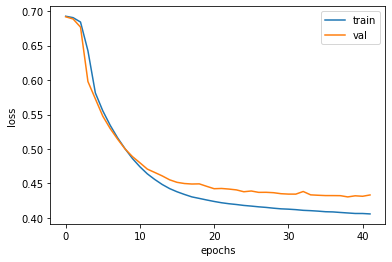

In [69]:
#검증과 손실 그래프..

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**순환층에 드롭아웃 적용하기**

SimpleRNN과 LSTM모델 모두 자체적으로 dropout, recurrent_dropout매개변수를 가짐

    - dropout : 셀의 입력에 드롭아웃을 적용
    - recurrent_dropout : 순환되는 은닉상태에 드롭아웃을 적용 (GPU로 모델 훈련불가.. -> 시간 오래걸림)

In [70]:
#드롭아웃 30퍼..

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [78]:
#다시 컴파일 및 훈련..

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

#콜백 지정..
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

#훈련
history = model2.fit(train_seq, train_target, epochs = 100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6921 - accuracy: 0.5304 - val_loss: 0.6906 - val_accuracy: 0.5880
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6876 - accuracy: 0.6083 - val_loss: 0.6837 - val_accuracy: 0.6536
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6727 - accuracy: 0.6710 - val_loss: 0.6545 - val_accuracy: 0.7090
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6112 - accuracy: 0.7128 - val_loss: 0.5813 - val_accuracy: 0.7148
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5667 - accuracy: 0.7272 - val_loss: 0.5562 - val_accuracy: 0.7398
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5483 - accuracy: 0.7423 - val_loss: 0.5373 - val_accuracy: 0.7574
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5314 - accuracy: 0.7550 - val_loss: 0.5218 - val_accuracy: 0.7668

최고 성능 : 33에포크에서 검증손실 0.4303 -> 정확도 0.8026

드롭아웃 없을때 0.8010이었는데 조금 증가..

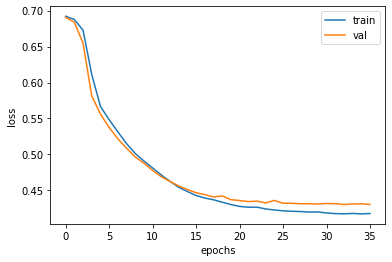

In [79]:
#약간 검증손실 향상..손실그래프..
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**2개의 층을 연결하기**

여러개의 층을 연결할 때 주의할 점

- 모든 순환층에 순차데이터가 필요하다

- 마지막 층을 제외하고는 모든 은닉상태를 출력해야한다

- return_sequences 매개변수를 True로 지정하면 가능하다..

In [80]:
#여러 층을 연결한 새로운 모델..

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length = 100))
#첫번째 층 추가.. 은닉상태 반환 True 지정
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
#두번째 층 추가..
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [81]:
#함 보자..
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


임베딩 층의 모델 파라미터

- 500 (토큰 갯수) * 16 (실수벡터 크기)

LSTM 첫번째 층의 모델 파라미터

- {16 (실수벡터 크기) * 8 (뉴런의 갯수) + 8 * 8 (서로 순환될 때 뉴런끼리 곱해지는 가중치) + 8 (절편)} * 4 (LSTM층은 셀이 4개) 
    
    ->  200 * 4 = 800

LSTM 두번째 층의 모델 파라미터

- {8 (입력의 크기) * 8 (뉴런의 갯수) + 8 * 8 (서로 순환될 때 뉴런끼리 곱해지는 가중치) + 8 (절편)} * 4 (LSTM층은 셀이 4개)

    -> (64 + 64 + 8) * 4 = 544

밀집층의 모델 파라미터

- 8 (입력뉴런) * 1 (출력뉴런) + 1 (절편) -> 9

In [82]:
#모델 컴파일 및 훈련.. 동일..

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

#콜백 지정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

#훈련..
history = model3.fit(train_seq, train_target, epochs = 100, batch_size=64, validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 15ms/step - loss: 0.6926 - accuracy: 0.5312 - val_loss: 0.6920 - val_accuracy: 0.5264
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6897 - accuracy: 0.5551 - val_loss: 0.6870 - val_accuracy: 0.6040
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6750 - accuracy: 0.6102 - val_loss: 0.6575 - val_accuracy: 0.6712
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6164 - accuracy: 0.6987 - val_loss: 0.5829 - val_accuracy: 0.7242
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5636 - accuracy: 0.7319 - val_loss: 0.5443 - val_accuracy: 0.7444
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5384 - accuracy: 0.7433 - val_loss: 0.5248 - val_accuracy: 0.7508
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5185 - accuracy: 0.7536 - val_loss: 0.5046 - val_accuracy:

최고 성능 : 35에포크에 검증손실 0.4330  ->  정확도 0.8010

일반적으로 층을 쌓으면 더 성능이 좋아지는데 나는 그렇지는 않네..

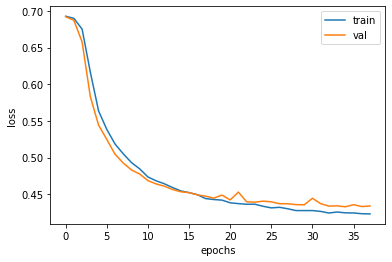

In [83]:
#그림..

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**GRU 구조**

- Gated Recurrent Unit의 약자..  LSTM을 간소화한 버전

- 은닉상태만 가진다..

- 3개의 셀로 이루어짐 ( 시그모이드 2, tanh 1 )

**다음 은닉상태 값 계산**

각각의 셀의 입력과 이전 은닉상태를 위한 가중치를 W1, W2, W3이라고 하자

    - A : 입력과 이전 은닉상태에 가중치 W1을 곱해서 시그모이드를 통과한 값

    - B : 입력과 이전 은닉상태에 가중치 W2를 곱해서 시그모이드를 통과한 값

    - C : 입력과 (B의 값과 이전 은닉상태를 곱한 값)에 가중치 W3을 곱해서 tanh를 통과한 값
    
        -> B가 C에 들어가는 이전 은닉상태의 비율을 조절한다고 생각하면 된다 

**!!결과!!**

은닉상태 = A * { 이전 은닉상태 + ( 1 - A ) * C }

GRU 가 모델 파라미터는 적지만 LSTM에 못지않은 좋은 성능을 낸다..

**GRU 신경망 훈련하기**

In [84]:
#LSTM 클래스를 GRU 클래스로 바꾼것 외에는 모두 동일하다..

model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [85]:
#함보자..
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


임베딩 층의 모델 파라미터

- 500 (토큰 갯수) * 16 (실수벡터 크기)

GRU 층의 모델 파라미터

- 원래 앞의 설명대로라면 3개의 셀이 있으니 200 * 3 해서 600이어야 한다
- 근데 텐서플로에서는 GPU를 사용하기 위해 C가 계산될 때 절편이 하나 추가된다..
    
    -> 이전 은닉상태에 가중치 먼저 곱해지고 절편 더해지고, 입력은 또 따로 가중치에 곱해지고 또다른 절편이 더해진다.
    
    -> 여기서 절편(모델 파라미터)하나가 추가된다..
- 결국 계산은 다음과 같다

    - {16 (실수벡터 크기) * 8 (뉴런의 갯수) + 8 * 8 (서로 순환될 때 뉴런끼리 곱해지는 가중치) + 8 (절편) + 8 (GPU사용을 위해 추가된 절편)} * 3 (GRU층은 셀이 4개) 
    - 624개의 모델 파라미터..

밀집층의 모델 파라미터

- 8(입력 뉴런) * 1(출력 뉴런) + 1(절편) -> 9

In [86]:
#모델 훈련..

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])

#콜백 지정..
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-GRU-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

#훈련..
history = model4.fit(train_seq, train_target, epochs = 100, batch_size=64, validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6923 - accuracy: 0.5242 - val_loss: 0.6911 - val_accuracy: 0.5548
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6895 - accuracy: 0.5763 - val_loss: 0.6881 - val_accuracy: 0.5828
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6852 - accuracy: 0.6007 - val_loss: 0.6835 - val_accuracy: 0.6010
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6785 - accuracy: 0.6222 - val_loss: 0.6761 - val_accuracy: 0.6168
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6682 - accuracy: 0.6371 - val_loss: 0.6643 - val_accuracy: 0.6274
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6525 - accuracy: 0.6522 - val_loss: 0.6469 - val_accuracy: 0.6414
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6281 - accuracy: 0.6732 - val_loss: 0.6191 - val_accuracy: 0.6726

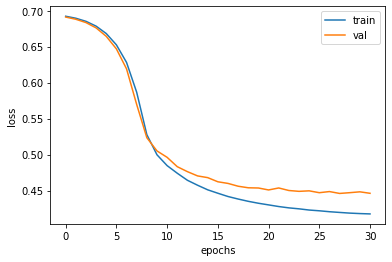

In [87]:
#그림..

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**LSTM과 GRU 셀로 훈련**

해보니까 2개의 LSTM 순환층을 쌓은 'best-2rnn-model.h5'가 가장 좋았다..

불러와서 테스트 세트의 성능을 한번 보자..

In [90]:
#테스트 세트 준비..
test_seq = pad_sequences(test_input, maxlen=100)

#최고 모델 불러오기
best_rnn_model = keras.models.load_model('best-2rnn-model.h5')

#테스트 성능 평가
best_rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 5ms/step - loss: 0.4287 - accuracy: 0.7989


[0.42869535088539124, 0.7989199757575989]

#전체 정리

- 순차데이터는 샘플의 이전 내용을 기억해야한다.. -> 순환신경망

- SimpleRNN 클래스로 순환신경망을 만들수 있다..

- 원핫인코딩

    - 어휘사전의 갯수만큼 원핫인코딩(0, 1로 바꿈)한다 -> 입력데이터가 너무 커짐

- 단어임베딩

    - 변형된 숫자 그대로 실수벡터로 바꾼다..
    - 원핫인코딩보다 순환층에서 학습하는 모델 파라미터가 훨씬 줄어든다


    -> Simple RNN은 타임스텝이 오래지나면 오래된 데이터는 희미해진다는 단점이 있다.

- 이를 보완하기 위해서 LSTM, GRU 셀이 개발됨

    1) LSTM

        - 셀이 4개
        - 셀상태/ 은닉상태가 순환
        - 앙 복잡띠..
    
    2) GRU

        - LSTM을 간소화한 모델
        - 셀이 3개
        - 은닉상태만 순환
        - summary() 메서드에서 모델파라미터 갯수가 오차가 날 수 있음 (GPU 사용을 위함)